<p>I have created a new notebook that will serve as an overall record to my progress.  The results from the previous "Selecting Giants..." code have been adapted here.  I have implemented David's suggestion using numpy.where to make cuts in the data.  This has been done in the interest of efficiency  </p>

In [108]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load data
spec2 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1))

#Making cuts in LAMOST data
ind=numpy.where((spec2['TEFF_ADOP']>4050)
    &(spec2['TEFF_ADOP']<5875)
    &(spec2['LOGG_ADOP']<3.8)
    &(spec2['LOGG_ADOP']>0)
    &((spec2['LOGG_ADOP']-1.86)/(spec2['TEFF_ADOP']- 4035)<0.00345))
    
ind
#spec2r=spec2[ind]

(array([     31,     598,     618, ..., 1843153, 1843156, 1843185], dtype=int64),)

<IPython.core.display.Javascript object>


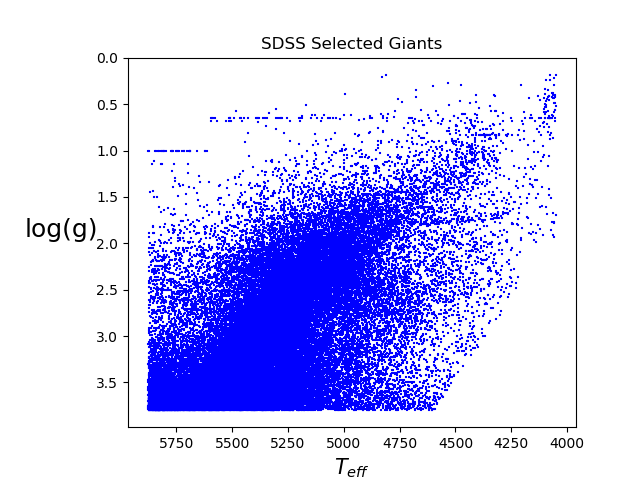

In [6]:
#Plotting logg vs Teff for SDSS data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('SDSS Selected Giants')

plt.show()

In [ ]:
spec2r.write('ssppgiants.fits', format='fits')

<p>Here I demonstrate that it is unnecessary to make cuts in the LAMOST data as the giants have already been selected  </p>

<IPython.core.display.Javascript object>


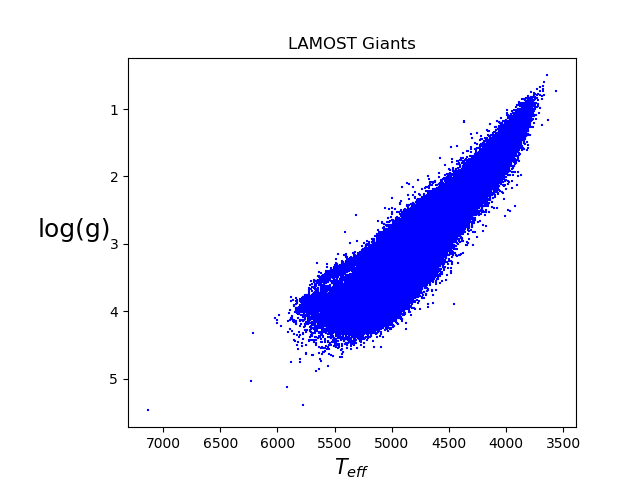

In [3]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<p>I explored the use of over-density plots rather than scatter plots to show more detail in my graphs. (The LAMOST plot took several hours due to the number of data points). I employed the function gaussian_kde from scipy in order to calculate point density. </p>

<IPython.core.display.Javascript object>


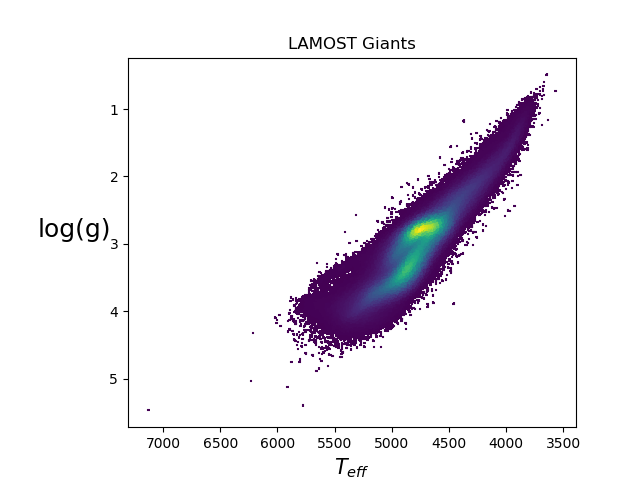

In [14]:
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde

#Load LAMOST data
spec3 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1))

#Plotting logg vs Teff for LAMOST data
%matplotlib nbagg
import matplotlib.pyplot as plt
y=spec3['logg']
x=spec3['Teff']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#plt.figure(figsize=(18,18))
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('LAMOST Giants')

plt.show()

<IPython.core.display.Javascript object>


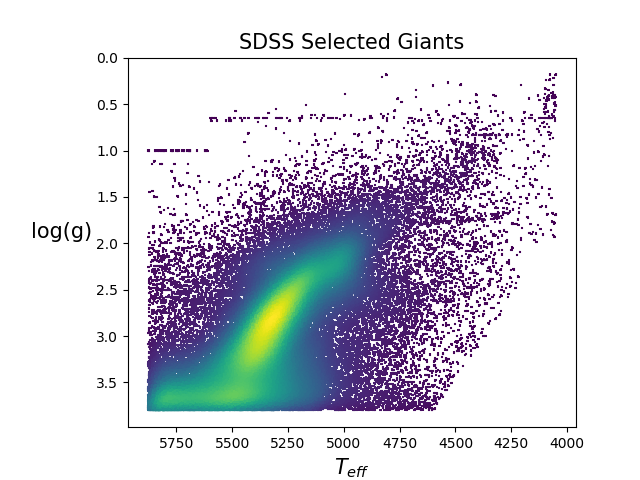

In [3]:
#Plotting logg vs Teff for SDSS data
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Define axes/variables
y=spec2r['LOGG_ADOP']
x=spec2r['TEFF_ADOP']

# Calculate the point density
xy = np.vstack([x,y])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x,y,c=z,marker='+',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=15)
plt.gcf().subplots_adjust(left=0.20)
plt.figsize=(18,16)
ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
plt.title('SDSS Selected Giants',fontsize=15)

plt.show()

<p> I loaded the Munn data and prepared for cross-matching. </p>

<IPython.core.display.Javascript object>


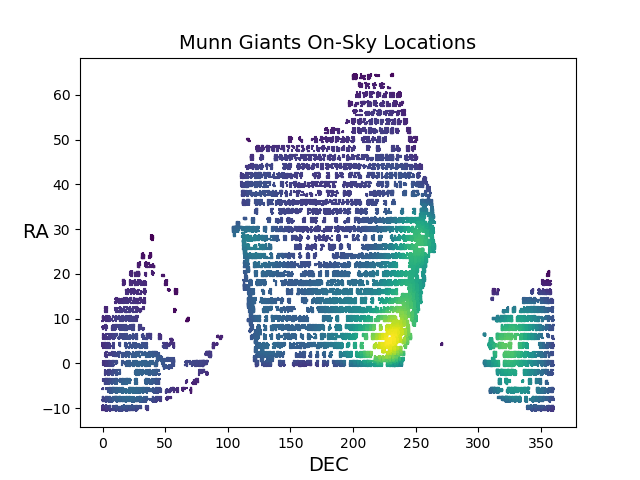

In [4]:
#Plotting RA vs. DEC for Munn data alone
#Load libraries and functions
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg
import matplotlib.pyplot as plt

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Set variables for RA and DEC as y and x
y1=phot['DEC']
x1=phot['RA']

# Calculate the point density for Munn Giants
xy = np.vstack([x1,y1])
z = gaussian_kde(xy)(xy)

#Scatter plot
plt.scatter(x1,y1,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('Munn Giants On-Sky Locations',fontsize=14)

plt.show()

<p>I then loaded the SDSS fitz file with the cuts I had made previously, and cross-matched with the DDO51 photometric data. </p>

In [1]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiants.fits',1)

#Cross-matching


#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

<p>Plotted the photometric and spectroscopic star locations separately and after cross-matching for comparison.</p>

<IPython.core.display.Javascript object>


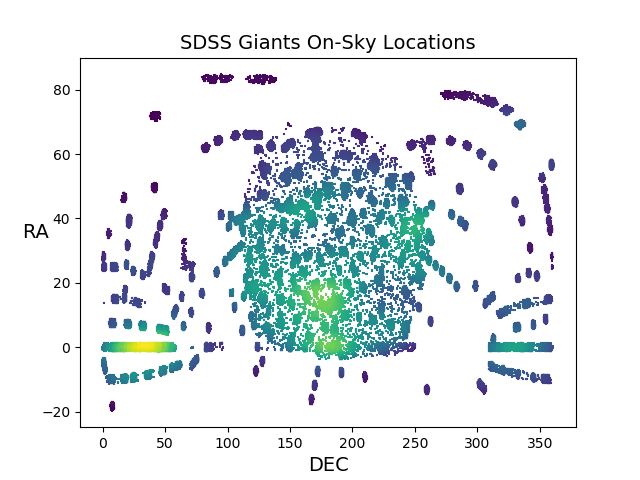

In [7]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('SDSS Giants On-Sky Locations',fontsize=14)

plt.show()

In [3]:
cmssppgiants=phot[good]

<IPython.core.display.Javascript object>


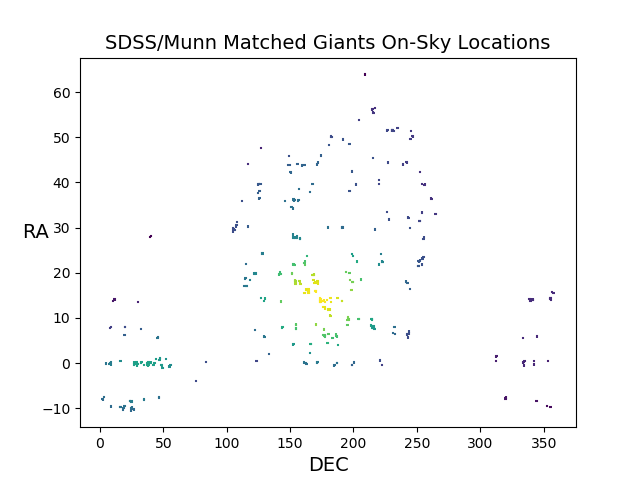

In [15]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=cmssppgiants['DEC']
x3=cmssppgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('SDSS/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()

<p>As far as I understand it, the "good" variable is an index of all the points in phot that have matches in the spec (SDSS) catalog I created.</p>

<p>I read a tutorial online on how to use SkyCoord to perform cross-matching.  A useful plot is the histogram below.  It shows how separated the data points are within d2d (on-sky distance).</p>

<IPython.core.display.Javascript object>


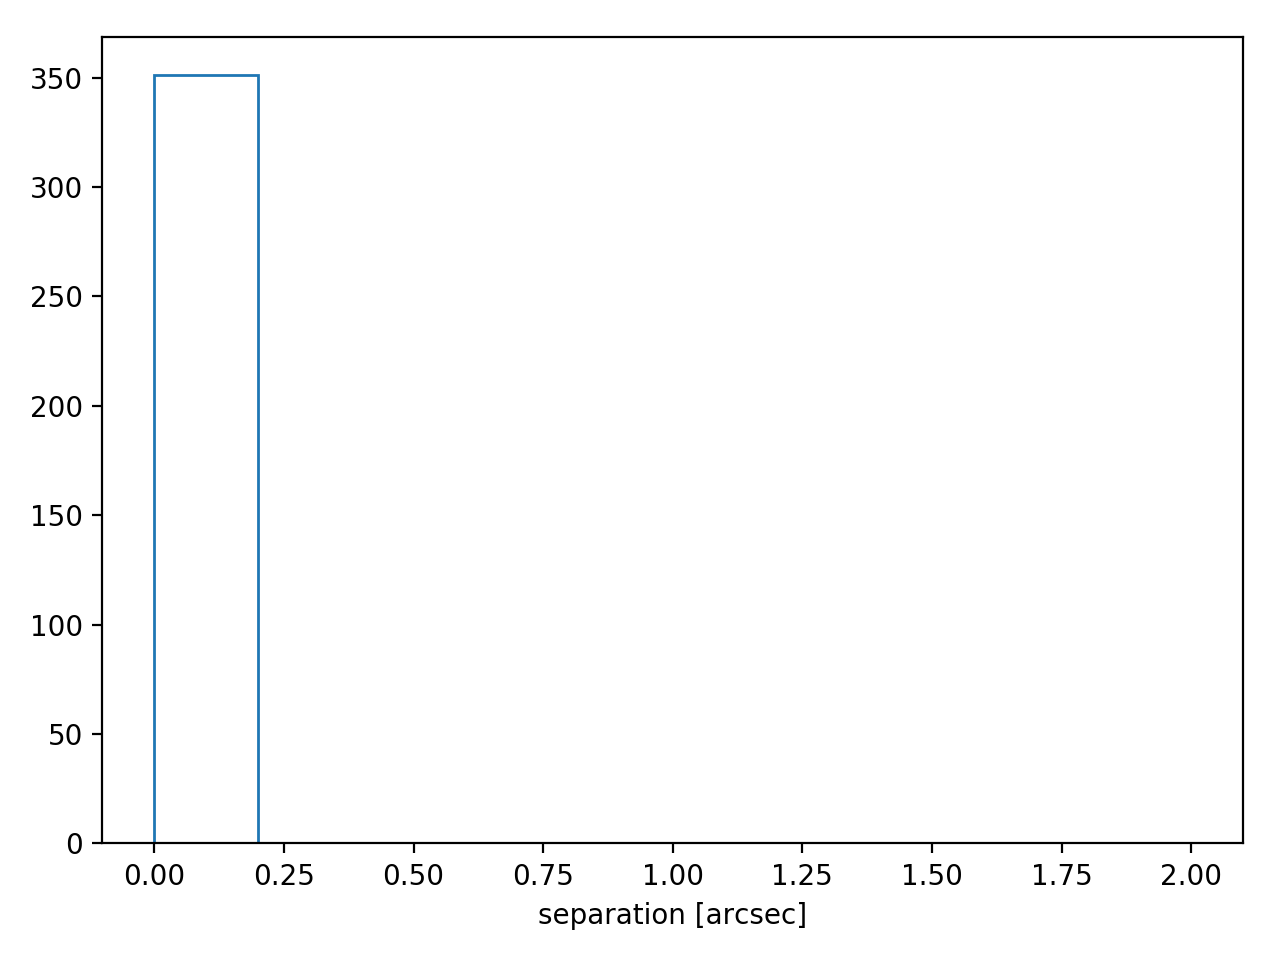

In [2]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

<p>Removing duplicates using KDTREE.</p>

In [4]:
#Import numpy and scipy
import numpy
import scipy

def printRepeating(arr, size):
 
    print("Repeating elements are ",
                         end = '')
    for i in range (0, size):
        for j in range (i + 1, size):
            if arr[i] == arr[j]:
                print(arr[i], end = ' ')
                
printRepeating(cmssppgiants['ra'],351)
#cmssppgiants['ra']

Repeating elements are 199.30981519 252.14295902 230.72666959 

In [ ]:
cmssppgiants['ra']

<p>Apply the same process to cross-match with LAMOST data.</p>

In [148]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec < .1)

<IPython.core.display.Javascript object>


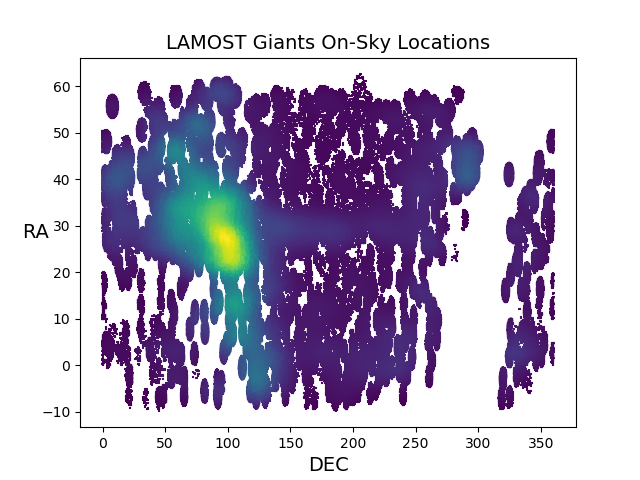

In [103]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of spec data as y and x
y2=spec['DEC']
x2=spec['RA']

# Calculate the point density for SDSS giants
xy = np.vstack([x2,y2])
z = gaussian_kde(xy)(xy)

#Scatter plot of SDSS sky locations
plt.scatter(x2,y2,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
plt.title('LAMOST Giants On-Sky Locations',fontsize=14)

plt.show()

In [110]:
LAMOSTgiants=phot[good]

<IPython.core.display.Javascript object>


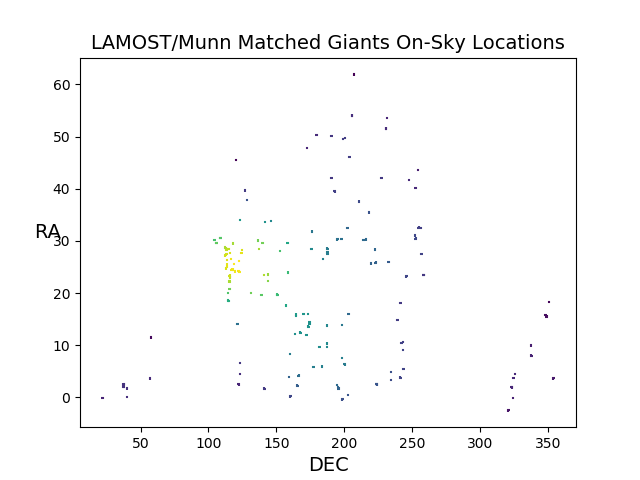

In [111]:
#Import libraries and functions
from scipy.stats import kde
from scipy.stats import gaussian_kde
%matplotlib nbagg

#Set variables for RA and DEC of matched data as y and x
y3=LAMOSTgiants['DEC']
x3=LAMOSTgiants['RA']

# Calculate the point density for matched giants
xy1 = np.vstack([x3,y3])
z = gaussian_kde(xy1)(xy1)

#Scatter plot of matched sky locations
plt.scatter(x3,y3,c=z,marker='+',s=3)
plt.xlabel('DEC',fontsize=14)
plt.ylabel('RA',rotation='horizontal',fontsize=14)
plt.figsize=(18,16)
ax=plt.gca()
plt.title('LAMOST/Munn Matched Giants On-Sky Locations',fontsize=14)

plt.show()

<IPython.core.display.Javascript object>


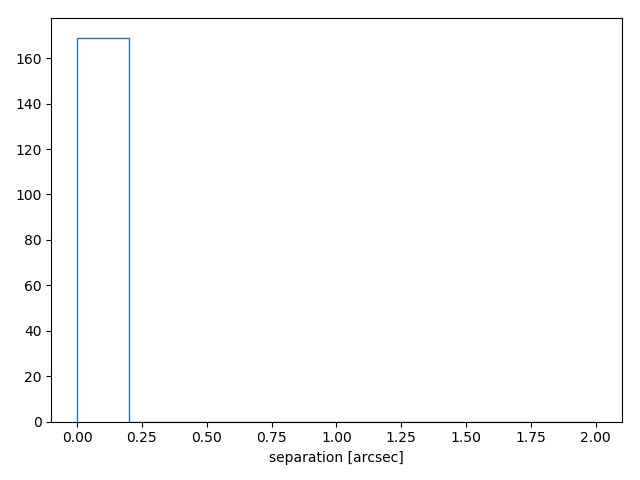

In [149]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

In [142]:
#Import numpy and scipy
import numpy
import scipy

def printRepeating(arr, size):
 
    print("Repeating elements are ",
                         end = '')
    for i in range (0, size):
        for j in range (i + 1, size):
            if arr[i] == arr[j]:
                print(arr[i], end = ' ')
                
printRepeating(LAMOSTgiants['ra'],169)
#LAMOSTgiants['ra']
     

Repeating elements are 258.47925457 108.72498116 105.81014752 230.72666959 205.64084436 223.80790215 

<p>Trying an alternate method for removing duplicates.  I am trying to use np.unique.</p>

In [128]:
#Load libraries and functions
import numpy as np
from astropy.io import fits
from astropy.table import Table
import numpy

arr = np.vstack((cmssppgiants['ra'],cmssppgiants['dec'])).T

def unique_rows(a):
    a = np.ascontiguousarray(a)
    unique_a, indices = np.unique(a.view([('', a.dtype)]*a.shape[1]),return_index=True)
    ordered = np.sort(indices)
    return ordered

index=unique_rows(arr)

#index
cmndSSPPgiants=Table(cmssppgiants[index])
cmndSSPPgiants

OBJID,FIELD,NIGHT,IMAGE,CHIP,RA,DEC,G,GERR,R,RERR,I,IERR,RAWD,RAWDERR,D,DERR,AG,AR,AI,AD,GI0CORR,GD0CORR,DELTA_GD,GISHIFT,GDSHIFT,MT,MD,MT0,MD0,MT0CORR,MD0CORR,M0,M,MERR,T0,T,TERR,GLON,GLAT
int64,str12,str7,int32,int32,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
1237667228765257992,96034,g11d328,34,2,45.77416783,5.85176225,19.5476,0.019194,18.7632,0.015372,18.4506,0.017977,17.225,0.047,19.3843,0.0471899,0.450396,0.326665,0.2477,0.450396,0.89423,0.163314,0.1784,0.0,-0.00725044,1.33248,-0.0388451,1.24111,0.0774813,1.24111,0.0774813,19.3454,19.3454,0.019194,0.0,18.0129,0.017977,171.833,-44.1664
1237670015662031041,96034,g11d328,34,3,45.48199275,5.5419325,17.3469,0.016253,16.2203,0.011871,15.7433,0.012923,14.977,0.0057,17.1884,0.00863272,0.409851,0.297258,0.225402,0.409851,1.41916,0.158558,0.274466,0.0,0.00366397,1.79028,-0.150335,1.69891,-0.0340089,1.69891,-0.0340089,17.038,17.038,0.016253,0.0,15.2477,0.012923,171.825,-44.5912
1237654599945551996,92100,g11d328,46,2,133.56336829,2.06843841,15.3071,0.012748,14.4639,0.013642,14.1357,0.010961,12.616,0.0036,15.1783,0.00631683,0.131438,0.09533,0.072286,0.131438,1.11223,0.128739,0.203277,0.0,0.0013034,1.39656,-0.0917349,1.3052,0.0245915,1.3052,0.0245915,15.0866,15.0866,0.012748,0.0,13.69,0.010961,226.07,28.0727
1237669516361400320,96256,g11d333,2,2,344.64987214,5.90260985,17.154,0.019844,16.5008,0.020032,16.206,0.015349,14.695,0.0069,17.03,0.00874802,0.242123,0.175608,0.133158,0.242123,0.838991,0.124001,0.126875,0.0,0.00217327,1.20756,-0.0372524,1.1162,0.0790739,1.1162,0.0790739,16.9927,16.9927,0.019844,0.0,15.7852,0.015349,79.1847,-47.1576
1237669765478154240,96014,g11d363,8,6,19.48152219,6.19393348,15.9351,0.023688,15.1806,0.022655,14.8386,0.017087,13.22,0.0046,15.7906,0.00681947,0.171061,0.124067,0.094077,0.171061,1.01949,0.144522,0.19409,0.0,0.0103405,1.33209,-0.0483027,1.24073,0.0680237,1.24073,0.0680237,15.7423,15.7423,0.023688,0.0,14.4102,0.017087,134.783,-56.067
1237652900231315712,82034,g11d363,14,6,46.42945743,-7.74876867,17.6871,0.025625,16.8443,0.026027,16.4989,0.020385,14.974,0.0059,17.5529,0.00722407,0.327251,0.23735,0.179975,0.327251,1.04088,0.134138,0.190181,0.0,0.00275257,1.41115,-0.0862331,1.31978,0.0300932,1.31978,0.0300932,17.4667,17.4667,0.025625,0.0,16.0556,0.020385,187.848,-52.7741
1237652900768317440,82034,g11d363,14,6,46.60529015,-7.47951181,17.4188,0.015842,16.571,0.015749,16.2091,0.01301,14.686,0.0059,17.2628,0.00722407,0.340764,0.24715,0.187407,0.340764,1.0563,0.155936,0.216331,0.0,0.00275257,1.42993,-0.0659866,1.33857,0.0503397,1.33857,0.0503397,17.1968,17.1968,0.015842,0.0,15.7669,0.01301,187.655,-52.4756
1237658492794372352,96096,g11d363,25,5,129.6695997,5.88984208,18.4771,0.015818,17.8878,0.012489,17.6549,0.01355,15.732,0.0107,18.3057,0.012092,0.133544,0.096857,0.073444,0.133544,0.762089,0.171447,0.164645,0.0,-0.0038265,1.10552,0.0301208,1.01416,0.146447,1.01416,0.146447,18.3358,18.3358,0.015818,0.0,17.2303,0.01355,220.202,26.493
1237667229833036032,98024,g11d365,14,3,32.18141208,7.52313413,16.6501,0.020878,15.5978,0.015765,15.1189,0.023868,13.832,0.0066,16.4296,0.0117943,0.231998,0.168264,0.12759,0.231998,1.42674,0.220517,0.336484,0.0,0.00450048,1.72169,-0.0651875,1.63032,0.0511389,1.63032,0.0511389,16.3644,16.3644,0.020878,0.0,14.6427,0.023868,154.063,-50.6176


*****

>### I'm going to start putting dates on these entries... Who knew!

*****
4/2/2018
====

>### One issue pointed out during a group meeting is my "good" values for cross-matching fall below 0.1 arcseconds. This should be 1 arcsecond. Below I make the adjustment to the original code.

*****

In [3]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiants.fits',1)

#Cross-matching


#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 

#MADE CHANGE FROM .1 ARCSEC TO 1 ARCSEC FOR THIS INDEX
good=(d2d.arcsec <1)

<IPython.core.display.Javascript object>


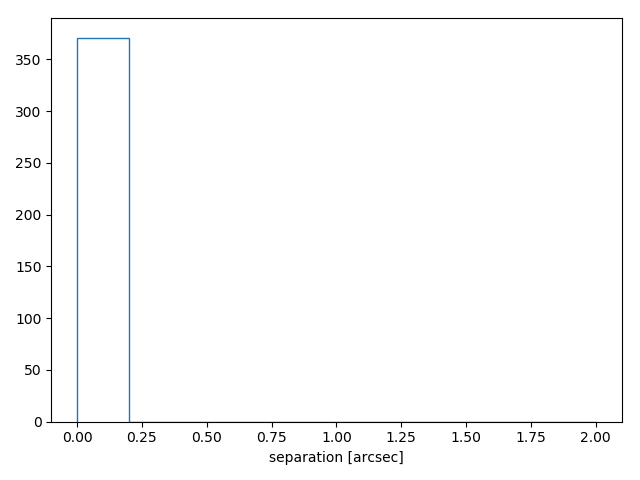

In [4]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

*****

>### We see no improvement with the SSPP Giants.

*****

In [7]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 

#MADE CHANGE FROM .1 ARCSEC TO 1 ARCSEC  THIS INDEX
good=(d2d.arcsec < 1)

<IPython.core.display.Javascript object>


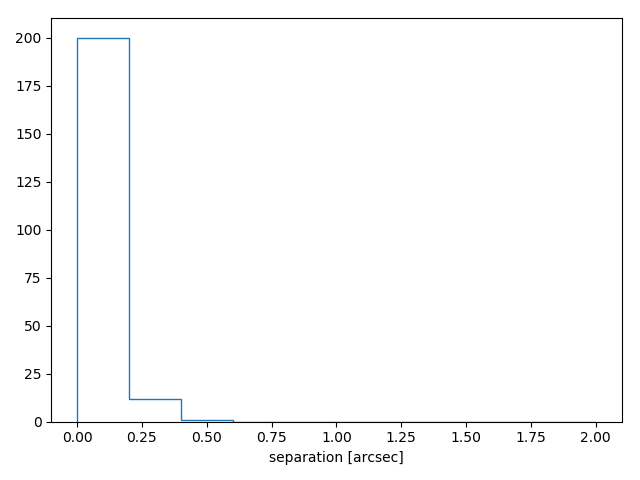

In [8]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

*****
>### Here we appear to have gained 43 additional stars.

>### David also mentioned that I should adjust my cut of giant stars (taken from SDSS).  Some dwarfs could be in my data near approximately log(3.5).

*****

In [34]:
#Load astropy
from astropy.io import fits
from astropy.table import Table
import numpy

#Load data
spec2 = Table(fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppOut-dr10.fits.gz',1))

#Making cuts in LAMOST data
ind=numpy.where((spec2['TEFF_ADOP']>4050)
    &(spec2['TEFF_ADOP']<5875)
    &(spec2['LOGG_ADOP']<3.5)
    &(spec2['LOGG_ADOP']>0)
    &((spec2['LOGG_ADOP']-1.86)/(spec2['TEFF_ADOP']- 4035)<0.00345))
    
spec2r=spec2[ind]

#NEW SSPP GIANTS FITS FILE
spec2r.write('ssppgiantsr.fits', format='fits')

*****

> ### For simplicity, I will do the simple type of plot from the beginning to verify that the code above removed giants "above" log(3.5).

*****

<IPython.core.display.Javascript object>


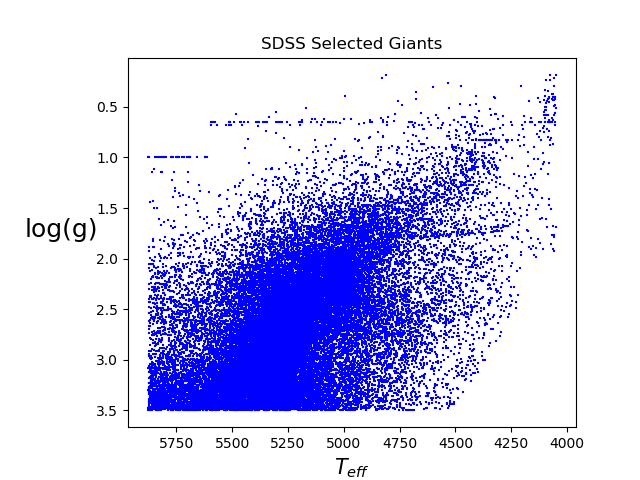

In [36]:
#Plotting logg vs Teff for SDSS data
%matplotlib nbagg
import matplotlib.pyplot as plt

#Load data
data=fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiantsr.fits',1)

y=data['LOGG_ADOP']
x=data['TEFF_ADOP']

#plt.figure(figsize=(18,18))
plt.scatter(x,y,marker='+',c='blue',s=3)
plt.xlabel('$T_{eff}$',fontsize=15)
plt.ylabel('log(g)',rotation='horizontal',labelpad=25,fontsize=18)
plt.gcf().subplots_adjust(left=0.20)
#plt.xlim(3000,7000)
#plt.ylim(0,6)
plt.figsize=(18,16)

ax=plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()

plt.title('SDSS Selected Giants')

plt.show()

>### Then I ran the cross-matching code again with the improved giant cut fits file.  Also, I was doing the histograms COMPLETELY wrong.  I have adjusted the first entry in plt.hist from d2d[good].arcsec to just good.

In [20]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiantsr.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec <1)

<IPython.core.display.Javascript object>


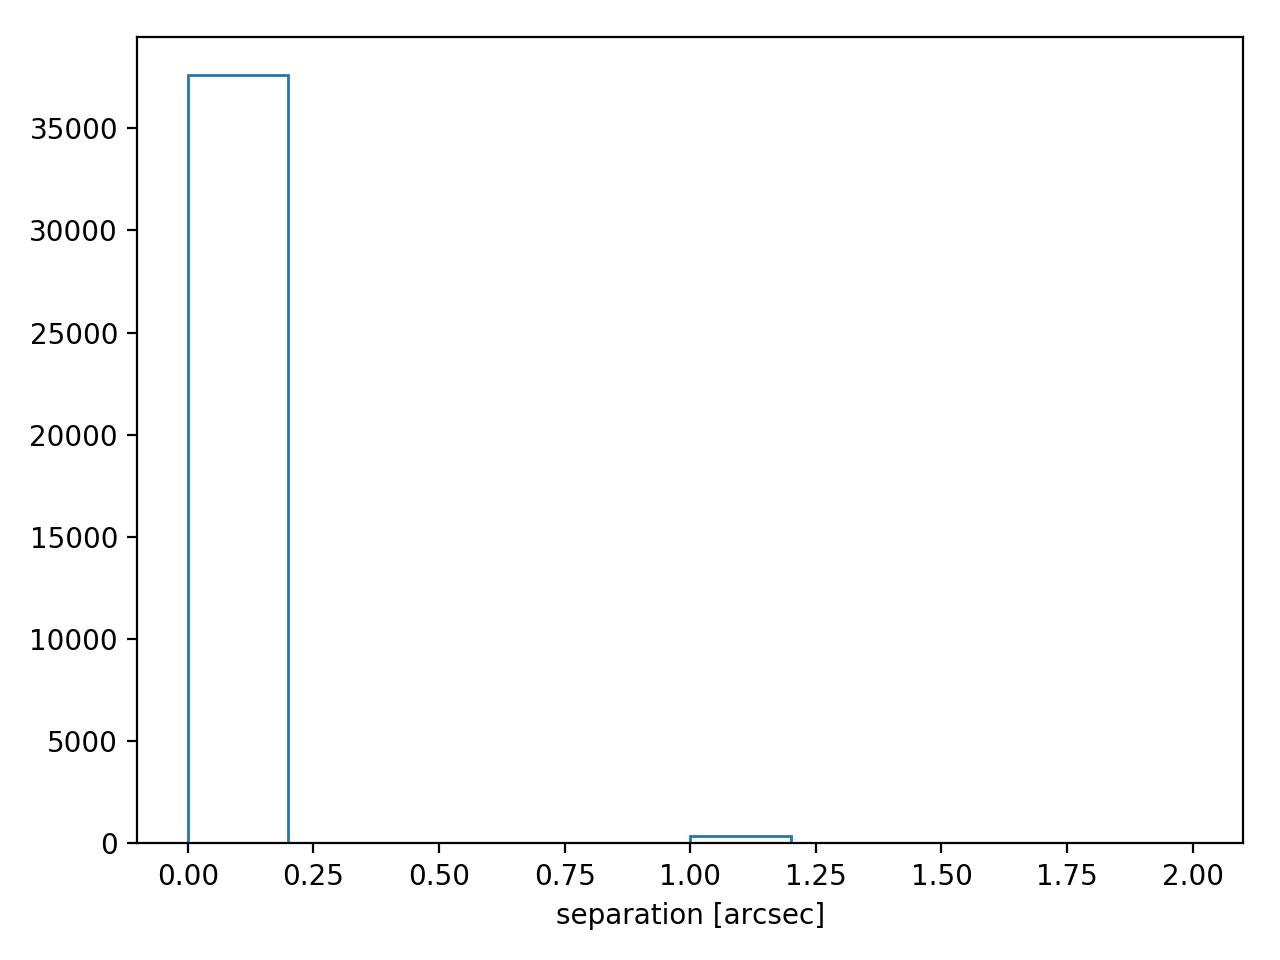

In [21]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(good, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

>### Now, I filter out only the all values that weren't cross-matched.  The values in phot (Munn giants) will be unique.  However, the values in spec (SDSS) may contain duplicates.  I verified that both tables have the same number of rows as expected.  Specifically, they have 37,935 rows.

In [22]:
spec_xmatch = spec[idx]

len(spec_xmatch['RA'])
#len(phot['RA'])

37935

*****

>### Below I create an empty table and populate it with data from SDSS and the Munn survey of giants.  The columns that I kept include:

>* SDSS
>    * RA
>    * DEC
>    * Teff-adop
>    * logg-adop
>    * feh-adop (metallicity)
>    * snr (signal to noise)
>    * vhelio
>* Munn 
>    * RA
>    * DEC
>    * gi0corr
>    * gd0corr
>    * delta_gd

>### I start by creating a blank table, and creating an object with the required number of rows 37935.


In [23]:
#Load libraries and functions
import numpy as np
from astropy.io import fits

#Make new table
dt = np.dtype([('RAspec',float),('DECspec',float),('Teff_adop',float),('logg_adop',float),('feh_adop',float),('snr',float),('vhelio',float),('RAphot',float),('DECphot',float),('gi0corr',float),('gd0corr',float),('delta_gd',float)])
cat = np.zeros(37935, dtype=dt)

>### Now I load data into the catalog from phot and spec.

In [24]:
#Load libraries and functions
import numpy as np
from astropy.io import fits

#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)
phot.columns
spec_xmatch.columns

ColDefs(
    name = 'SPECOBJID'; format = '22A'
    name = 'PLATEID'; format = '19A'
    name = 'BESTOBJID'; format = '19A'
    name = 'FLUXOBJID'; format = '19A'
    name = 'TARGETOBJID'; format = '22A'
    name = 'SPECPRIMARY'; format = 'J'
    name = 'SPECLEGACY'; format = 'J'
    name = 'SPECSEGUE'; format = 'J'
    name = 'SPECSEGUE1'; format = 'J'
    name = 'SPECSEGUE2'; format = 'J'
    name = 'PLUG_RA'; format = 'D'
    name = 'PLUG_DEC'; format = 'D'
    name = 'LEGACY_TARGET1'; format = 'J'
    name = 'LEGACY_TARGET2'; format = 'J'
    name = 'SPECIAL_TARGET1'; format = 'K'
    name = 'SPECIAL_TARGET2'; format = 'K'
    name = 'FIRSTRELEASE'; format = '3A'
    name = 'PROGRAMNAME'; format = '23A'
    name = 'CHUNK'; format = '16A'
    name = 'PLATERUN'; format = '16A'
    name = 'RUNSSPP'; format = '3A'
    name = 'RUN1D'; format = '1A'
    name = 'RUN2D'; format = '3A'
    name = 'MJD'; format = 'J'
    name = 'PLATE'; format = 'I'
    name = 'FIBER'; format = 'I'
    name 

In [2]:
#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

cat['RAspec'] = spec_xmatch['RA']
cat['DECspec'] = spec_xmatch['DEC']
cat['Teff_adop'] = spec_xmatch['Teff_adop']
cat['logg_adop'] = spec_xmatch['logg_adop']
cat['feh_adop'] = spec_xmatch['feh_adop']
cat['snr'] = spec_xmatch['snr']
#cat['vhelio'] = spec_xmatch['vhelio']
cat['RAphot'] = phot['RA']
cat['DECphot'] = phot['DEC']
cat['gi0corr'] = phot['gi0corr']
cat['gd0corr'] = phot['gd0corr']
cat['delta_gd'] = phot['delta_gd']


NameError: name 'spec_xmatch' is not defined

In [26]:
cat['DECphot'][1:10]

array([ 2.52932887,  2.30321591,  2.54111294,  2.4174506 ,  2.21376148,
        2.44939837,  2.35160412,  2.5312751 ,  2.00860523])

In [27]:
cat['DECspec'][1:10]

array([ 1.237362,  1.237362,  1.237362,  1.237362,  1.237362,  1.237362,
        1.237362,  1.237362,  1.237362])

4/3/2018
====

>### I can't find any columns with headers labeled 'vhelio.' Also, the above columns DECphot and DECspec should match, but they do not.

In [10]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (LAMOST)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\Ho2017_Catalog.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 

#MADE CHANGE FROM .1 ARCSEC TO 1 ARCSEC  THIS INDEX
good=(d2d.arcsec < 1)

<IPython.core.display.Javascript object>


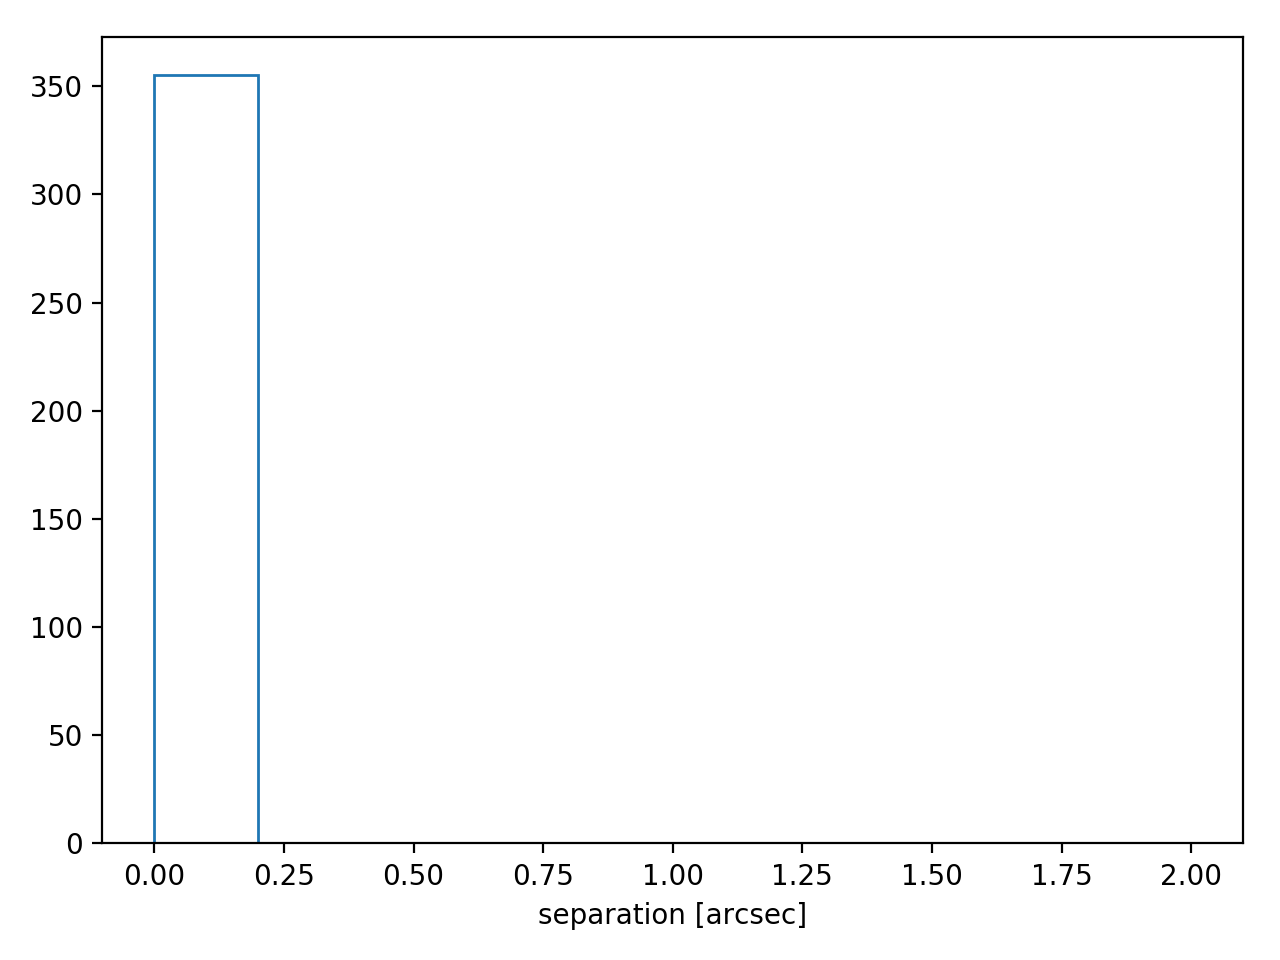

In [72]:
#Import libraries and functions
import matplotlib.pyplot as plt
import numpy as np
%matplotlib nbagg

plt.hist(d2d[good].arcsec, histtype='step', range=(0,2))
plt.xlabel('separation [arcsec]')
plt.tight_layout()

plt.show()

In [28]:
idx

array([2781, 2781, 2781, ...,  952,  952,  952])

In [29]:
spec_xmatch = spec[idx]

In [30]:
phot2=phot[good]
spec2=spec_xmatch[good]

In [31]:
spec2['RA'][1:10]

array([  45.481976,  133.56337 ,  344.64988 ,   19.481501,   46.429458,
         46.605292,   32.1814  ,   31.9881  ,  113.5535  ])

In [32]:
phot2['RA'][1:10]

array([  45.48199275,  133.56336829,  344.64987214,   19.48152219,
         46.42945743,   46.60529015,   32.18141208,   31.9880461 ,
        113.55349393])

>### Note that when I create a table below, I make it with 355 columns.  This is the actual number of cross-matched stars.

In [33]:
#Load libraries and functions

import numpy as np
from astropy.io import fits

#Make new table
dt = np.dtype([('RAspec',float),('DECspec',float),('Teff_adop',float),('logg_adop',float),('feh_adop',float),('snr',float),('vhelio',float),('RAphot',float),('DECphot',float),('gi0corr',float),('gd0corr',float),('delta_gd',float)])
cat = np.zeros(355, dtype=dt)

In [34]:
#Load libraries and functions
import numpy as np
from astropy.io import fits

#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Load photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Insert data into cat
cat['RAspec'] = spec2['RA']
cat['DECspec'] = spec2['DEC']
cat['Teff_adop'] = spec2['Teff_adop']
cat['logg_adop'] = spec2['logg_adop']
cat['feh_adop'] = spec2['feh_adop']
cat['snr'] = spec2['snr']
#cat['vhelio'] = spec2['vhelio']
cat['RAphot'] = phot2['RA']
cat['DECphot'] = phot2['DEC']
cat['gi0corr'] = phot2['gi0corr']
cat['gd0corr'] = phot2['gd0corr']
cat['delta_gd'] = phot2['delta_gd']


In [35]:
cat['DECphot'][1:10]

array([  5.5419325 ,   2.06843841,   5.90260985,   6.19393348,
        -7.74876867,  -7.47951181,   7.52313413,   7.78308909,  17.11998708])

In [36]:
cat['DECspec'][1:10]

array([  5.541938 ,   2.068436 ,   5.902624 ,   6.1939502,  -7.7487689,
        -7.4795101,   7.52314  ,   7.7831001,  17.119987 ])

5/23/2018
====

>### Today I will endeavor to get photometric metallicities.  First I need to recreate the catalog (cat) with the additional column devoted to d2d distances.

In [4]:
#Load libraries and functions
from astropy.io import fits
import numpy as np
from astropy.coordinates import SkyCoord
from astropy import units as u

#Import DDO51 photometric data
phot = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants.fits',1)

#Import the calibration data (i.e. SDSS with cuts)
spec = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\ssppgiantsr.fits',1)

#Cross-matching
#defines on-sky locations of photometric data and spectroscopic data as variables
c_phot=SkyCoord(ra=phot['RA']*u.degree,dec=phot['DEC']*u.degree)
c_spec=SkyCoord(ra=spec['RA']*u.degree,dec=spec['DEC']*u.degree)

#d2d represents on-sky distances
idx, d2d, d3d = c_phot.match_to_catalog_sky(c_spec) 
good=(d2d.arcsec <1)

#Match spec values (found from match to catalog sky) to phot
spec_xmatch = spec[idx]

#Cut out entries that are further than 1 arcsecond away from each other on the sky
phot2=phot[good]
spec2=spec_xmatch[good]
d2dx=d2d[good]

#Make new table for the catalog
dt = np.dtype([('RAspec',float),('DECspec',float),('Teff_adop',float),('logg_adop',float),('feh_adop',float),('snr',float),('vhelio',float),('RAphot',float),('DECphot',float),('gi0corr',float),('gd0corr',float),('delta_gd',float),('xmatch_dist',float)])
cat = np.zeros(355, dtype=dt)

#Load data from spec_xmatch and phot into catalog
cat['RAspec'] = spec2['RA']
cat['DECspec'] = spec2['DEC']
cat['Teff_adop'] = spec2['Teff_adop']
cat['logg_adop'] = spec2['logg_adop']
cat['feh_adop'] = spec2['feh_adop']
cat['snr'] = spec2['snr']
cat['RAphot'] = phot2['RA']
cat['DECphot'] = phot2['DEC']
cat['gi0corr'] = phot2['gi0corr']
cat['gd0corr'] = phot2['gd0corr']
cat['delta_gd'] = phot2['delta_gd']
cat['xmatch_dist'] = d2dx


>### Construct photometric metallicity histogram.

<IPython.core.display.Javascript object>


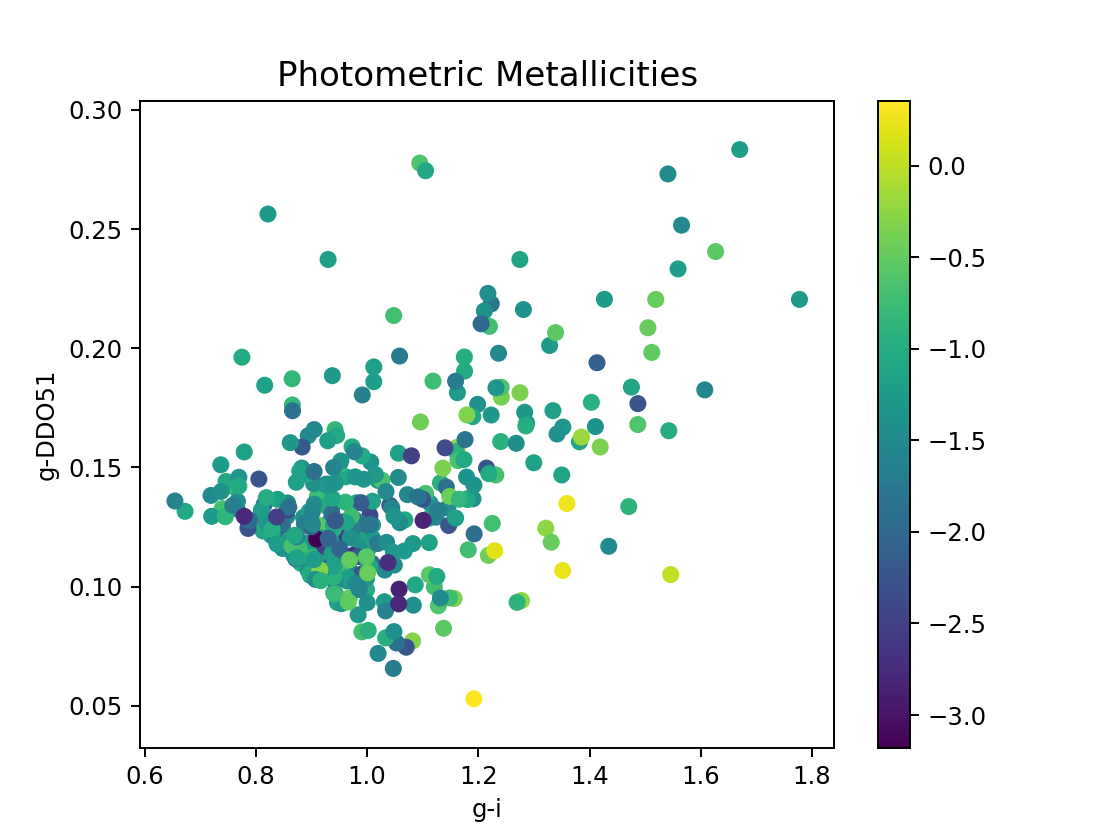

In [28]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib nbagg

#Construct plot

plt.scatter(cat['gi0corr'],cat['gd0corr'],c=cat['feh_adop'])
plt.figsize=(18,16)
plt.colorbar()
plt.xlabel('g-i',fontsize=10)
plt.ylabel('g-DDO51',fontsize=10)
plt.title('Photometric Metallicities',fontsize=14)

plt.show()

5/30/2018
====

>### David created a new fits file that cross-matches APOGEE with Gaia DR2.  I load and examine the data below.

In [9]:
#Load libraries and functions
from astropy.io import fits

#Load catalog
catg = fits.getdata('apogeegaia_giants.fits',1)

>### Below I filter the catalog into three subcatalogs with different magnitudes. 16<G<17, 17<G<18, and 18<G<19.

In [11]:
#Load numpy
import numpy as np

#Catalog with 16<G<17
ind=np.where((catg['G']>16)
                &(catg['G']<17))

catg16 = catg[ind]

#Catalog with 17<G<18
ind=np.where((catg['G']>17)
                &(catg['G']<18))

catg17 = catg[ind]

#Catalog with 18<G<19
ind=np.where((catg['G']>18)
                &(catg['G']<19))

catg18 = catg[ind]

In [13]:
from astropy.table import Table

tab = Table(catg)

In [21]:
tab

APSTAR_ID,TARGET_ID,ASPCAP_ID,FILE,APOGEE_ID,LOCATION_ID,FIELD,J,J_ERR,H,H_ERR,K,K_ERR,RA,DEC,GLON,GLAT,AK_TARG,AK_TARG_METHOD,AK_WISE,APOGEE_TARGET1,APOGEE_TARGET2,TARGFLAGS,NVISITS,COMMISS,SNR,STARFLAG,STARFLAGS,ANDFLAG,ANDFLAGS,VHELIO_AVG,VSCATTER,VERR,VERR_MED,SYNTHVHELIO_AVG,SYNTHVSCATTER,SYNTHVERR,SYNTHVERR_MED,RV_TEFF,RV_LOGG,RV_FEH,RV_CCFWHM,RV_AUTOFWHM,SYNTHSCATTER,STABLERV_CHI2 [2],STABLERV_RCHI2 [2],CHI2_THRESHOLD [2],STABLERV_CHI2_PROB [2],SFD_EBV,APSTAR_VERSION,ASPCAP_VERSION,RESULTS_VERSION,PARAM [7],FPARAM [7],"PARAM_COV [7,7]","FPARAM_COV [7,7]",TEFF,LOGG,LOGVMICRO,METALS,CFE,NFE,ALPHAFE,TEFF_ERR,LOGG_ERR,METALS_ERR,LOGVMICRO_ERR,CFE_ERR,NFE_ERR,ALPHAFE_ERR,ASPCAP_CHI2,ASPCAP_CLASS,ASPCAPFLAG,ASPCAPFLAGS,PARAMFLAG [7],REDUCTION_ID,SRC_H,WASH_M,WASH_M_ERR,WASH_T2,WASH_T2_ERR,DDO51,DDO51_ERR,IRAC_3_6,IRAC_3_6_ERR,IRAC_4_5,IRAC_4_5_ERR,IRAC_5_8,IRAC_5_8_ERR,IRAC_8_0,IRAC_8_0_ERR,WISE_4_5,WISE_4_5_ERR,TARG_4_5,TARG_4_5_ERR,WASH_DDO51_GIANT_FLAG,WASH_DDO51_STAR_FLAG,PMRA,PMDEC,PM_SRC,ALL_VISITS,VISITS,ALL_VISIT_PK [40],VISIT_PK [40],MGH,G,BP,RP,BPRP,BPD
str37,str23,str39,str34,str18,int16,str16,float32,float32,float32,float32,float32,float32,float64,float64,float64,float64,float32,str17,float32,int32,int32,str97,int32,int16,float32,int32,str114,int32,str59,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str2,str2,str4,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,str1,int32,str181,int32,str18,str12,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,float32,float32,str20,str431,str359,int32,int32,float32,float32,float32,float32,float32,float32
apogee.n.s.s3.4221.2M07021998+3746579,4221.2M07021998+3746579,apogee.n.s.v304.4221.2M07021998+3746579,apStar-s3-2M07021998+3746579.fits,2M07021998+3746579,4221,180+19,10.652,0.022,10.105,0.021,9.987,0.016,105.583259,37.782761,179.149313448,18.2277289652,0.055997178,RJCE_WISE_PARTSKY,0.07068587,-2147481600,0,APOGEE_SHORT,3,0,204.742,0,SUSPECT_RV_COMBINATION,0,,-45.3414,0.299776,0.0144882,0.0269716,-45.7557,0.212403,0.0117872,0.0223655,4500.0,3.0,-0.5,22.6698,22.334,0.101337,236.10703 .. 176.16954,10.865243 .. 9.385348,13.815598 .. 13.815598,0.0 .. 0.0,0.1348438,s3,a3,v304,4784.74 .. 0.027218,4718.9 .. 0.027218,8463.779 .. 0.010000001,21.041 .. 9.7595e-06,4799.0,2.7611,0.14099799,-0.16958,-9999.99,-9999.99,0.027218,91.9988,0.2,0.0622366,-1.0,0.3,0.3,0.1,5.5642934,K,96,"CFE_WARN,NFE_WARN",0 .. 0,2M07021998+3746579,2MASS,12.846639,0.012,11.451611,0.085,12.870095,0.011,nan,nan,nan,nan,nan,nan,nan,nan,9.978,0.021,9.994,0.0,1,1,-7.1,-4.1,NOMAD,"r3-5586-55880-225,r3-5586-55939-219,r3-5586-55960-274","r3-5586-55880-225,r3-5586-55939-219,r3-5586-55960-274",59599 .. -1,59599 .. -1,-0.11593744,12.316998,12.917953,11.600426,1.3175268,-0.066844486
apogee.n.s.s3.4221.2M07023729+3753596,4221.2M07023729+3753596,apogee.n.s.v304.4221.2M07023729+3753596,apStar-s3-2M07023729+3753596.fits,2M07023729+3753596,4221,180+19,11.993,0.02,11.251,0.021,11.095,0.018,105.655384,37.899902,179.054910673,18.3222311403,0.08170194,RJCE_WISE_PARTSKY,0.07527597,-2147481600,0,APOGEE_SHORT,3,0,117.49,0,SUSPECT_RV_COMBINATION,0,,14.5159,0.0452549,0.0237239,0.0383449,14.4557,0.116269,0.0185589,0.0264169,4250.0,2.0,-0.5,22.3319,20.7675,0.159405,2.5661843 .. 39.07164,1.1327366 .. 4.4199343,13.815598 .. 13.815598,0.27717888 .. 0.0,0.11169334,s3,a3,v304,4169.8 .. 0.092748,4056.8 .. 0.092748,11049.309 .. 0.010000001,9.5329 .. 2.2034e-05,4114.3,1.4862,0.24503122,-0.52236,-9999.99,-9999.99,0.092748,105.11569,0.2,0.07413408,-1.0,0.3,0.3,0.1,4.1959467,K,112,"ALPHAFE_WARN,CFE_WARN,NFE_WARN",0 .. 1024,2M07023729+3753596,2MASS,14.809887,0.013136804,12.991964,0.063639395,14.900962,0.011190818,nan,nan,nan,nan,nan,nan,nan,nan,

In [27]:
(min(tab['G']), max(tab['G']))

(8.929427, 16.681076)

In [26]:
(min(tab['RP']), max(tab['RP']))

(8.311977, 15.766994)

>### Now, create three superimposed scatter plots with number counts of stars.

<IPython.core.display.Javascript object>


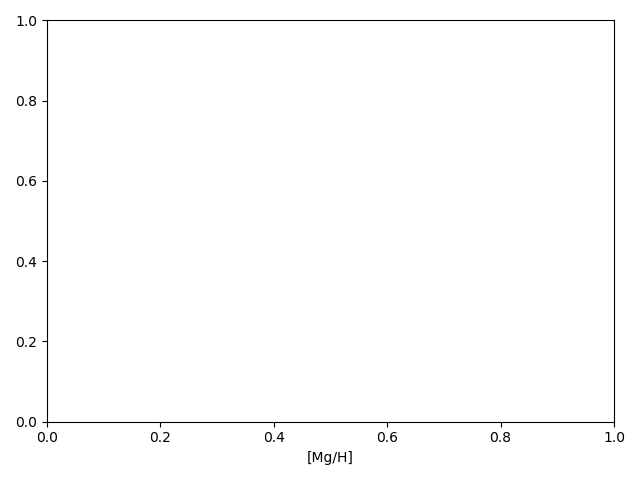

KeyError: "Key 'md' does not exist."

In [53]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib nbagg

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('[Mg/H]')
plt.tight_layout()

ax.hist(catg16['md'], label='16<G<17', histtype='step', range=(-0.4,0.2),bins=100, normed=true)
ax.hist(catg17['md'], label='17<G<18', histtype='step', range=(-0.4,0.2),bins=100, normed=true)
ax.hist(catg18['md'], label='18<G<19', histtype='step', range=(-0.4,0.2),bins=100, normed=true)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()

In [25]:
from astropy.table import Table

tab = Table(catg16)

In [43]:
catg17['md']

array([-0.03634644, -0.03380966, -0.06293488, ..., -0.11171722,
       -0.04768753, -0.1776638 ], dtype=float32)

>### I now create a color-color plot using the data and using pieces of Amy's code.

In [34]:
#Cut out extreme values of MGH
ind=np.where((catg['mgh']<100))

catg=catg[ind]

median:  -0.169732421637
mean:  -0.229291692772


<IPython.core.display.Javascript object>


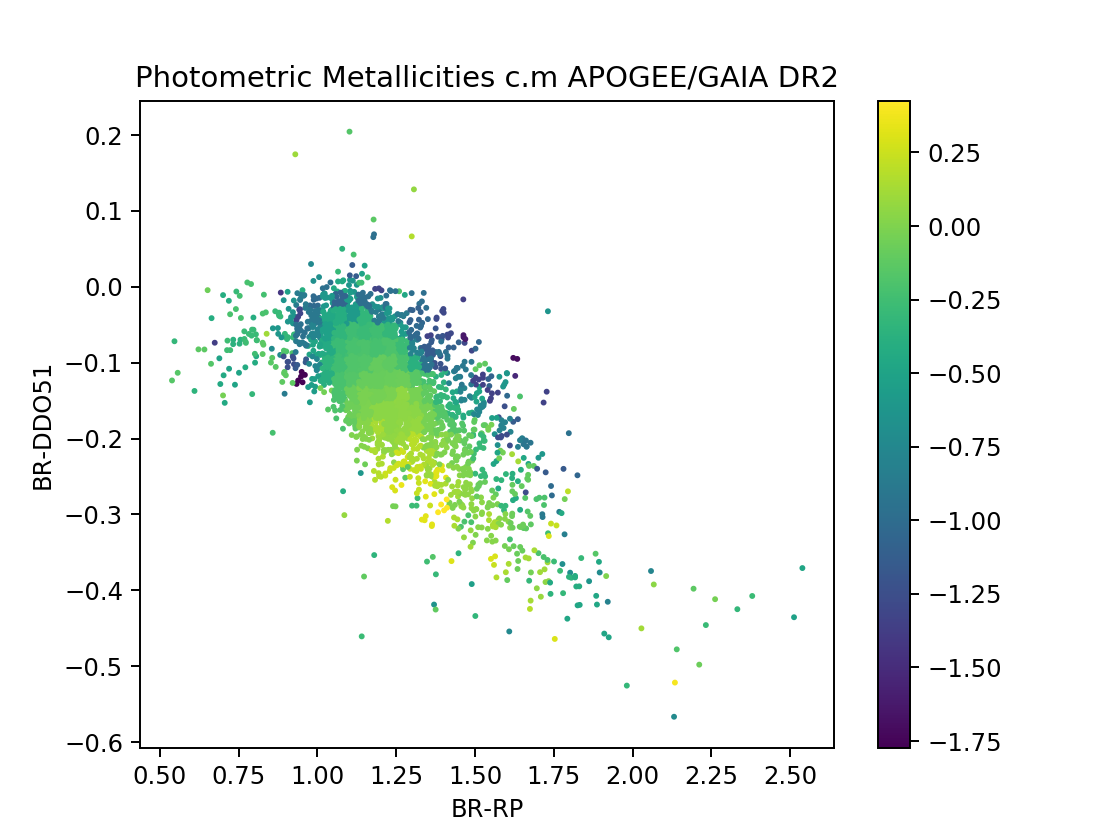

In [22]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy import stats
%matplotlib nbagg

#Construct plot

bp_rp = catg['bprp']
bp_dd = catg['bpd']

ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg["mgh"],'median',50)

#read out metallicity values using yumi's method
ind = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
ix = np.searchsorted(xedge,bp_rp[ind])
ix = ix-1
iy = np.searchsorted(yedge,bp_dd[ind])
iy = iy-1
new_metal = ret[ix,iy]

#find medium, mean metallicity
mean = np.nanmean(new_metal)
median = np.nanmedian(new_metal)
print("median: ",median)
print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
plt.scatter(bp_rp[ind],bp_dd[ind],c=new_metal,s=2)
plt.colorbar()
plt.xlabel('BR-RP')
plt.ylabel('BR-DDO51')
plt.title('Photometric Metallicities c.m APOGEE/GAIA DR2')
plt.show()
fig.savefig('APOGEE_GAIA_metal_plot.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

In [33]:
max(catg['MGH'])

9994.6

In [24]:
#Load numpy
import numpy as np

#Catalog with 13<G<14
ind=np.where((catg['G']>13)
                &(catg['G']<14))

catg13 = catg[ind]

#Catalog with 14<G<15
ind=np.where((catg['G']>14)
                &(catg['G']<15))

catg14 = catg[ind]

#Catalog with 15<G<16
ind=np.where((catg['G']>15)
                &(catg['G']<16))

catg15 = catg[ind]

<IPython.core.display.Javascript object>


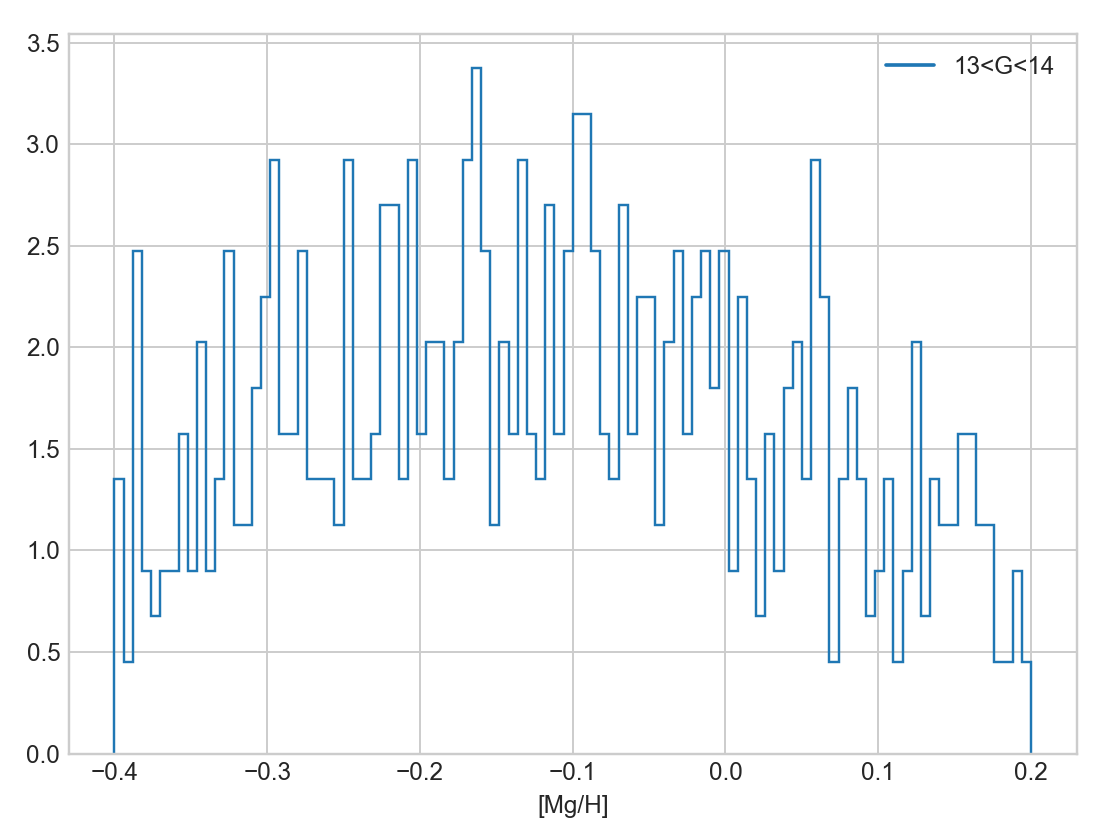

In [58]:
#Import libraries and functions
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib nbagg

fig = plt.figure()
ax = fig.add_subplot(111)

plt.xlabel('[Mg/H]')
plt.tight_layout()

ax.hist(catg13['mgh'], label='13<G<14', histtype='step', range=(-0.4,0.2),bins=100, normed=True)
#ax.hist(catg14['mgh'], label='14<G<15', histtype='step', range=(-0.4,0.2),bins=100, normed=True)
#ax.hist(catg15['mgh'], label='15<G<16', histtype='step', range=(-0.4,0.2),bins=100, normed=True)

# Create new legend handles but use the colors from the existing ones
handles, labels = ax.get_legend_handles_labels()
new_handles = [Line2D([], [], c=h.get_edgecolor()) for h in handles]

plt.legend(handles=new_handles, labels=labels)
plt.show()

>### Plotting the full catalog in a similar manner.

In [5]:
#Import libraries and functions
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy import stats
from astropy.io import fits
%matplotlib nbagg


#Load catalog
catg = fits.getdata(r'C:\Users\shebe\OneDrive\School\Graduate\Research\Nidever\Data\munn_giants_nocuts_withgaia_lowred.fits.gz',1)
catg

FITS_rec([ (1237678597540085772, '7712-301-4-123-12', '       92246', 'g11d302', 10, 1,  329.01503136,  2.33698058,  13.10430622,   4.65099496e-04,  12.15952396,   3.43186897e-04,  11.81278038,  0.00035968,  10.59700012,  0.0021,  13.06835747,  0.01040545,  0.229524  ,  0.16647001,  0.126229  ,  0.229524  , 7712, 2266, 6, 483856252014608, 4, 0,  1.18823147,  0.03594913,  0.12788388,  0.,  0.00187816, 1, 0,  1.50228393, -0.21623135,  1.40265799, -0.09783531,  1.40265799, -0.09783531,  12.85212612,  12.85212612,   4.65099496e-04,  0.,  11.34984207,  0.00035968,  60.72969818, -38.5173111 ,  12.20351219,  12.82864189,  11.47516727,  -7.67510128,  0.07796958,  -4.56796646,  0.09167489,  0.67472082,  0.05822996),
          (1237678597540020580, '7712-301-4-122-356', '       92246', 'g11d302', 10, 1,  328.9427575 ,  2.26734815,  20.18055725,   2.02559993e-01,  19.53988075,   1.46400005e-01,  19.22418404,  0.13188601,  17.5170002 ,  0.0418,  19.98751831,  0.04302445,  0.21381   ,  0.155073  , 

In [6]:
#Construct plot

bp_rp = catg['bprp']
bp_dd = catg['bpd']

ret,xedge,yedge,bin = stats.binned_statistic_2d(bp_rp,bp_dd,catg["mgh"],'median',50)

#read out metallicity values using yumi's method
#ind = np.where((bp_rp>=xedge.min())&(bp_rp<=xedge.max())&(bp_dd>=yedge.min())&(bp_dd<=yedge.max()))
#ix = np.searchsorted(xedge,bp_rp[ind])
#ix = ix-1
#iy = np.searchsorted(yedge,bp_dd[ind])
#iy = iy-1
#new_metal = ret[ix,iy]

#find medium, mean metallicity
#mean = np.nanmean(new_metal)
#median = np.nanmedian(new_metal)
#print("median: ",median)
#print("mean: ",mean)
    
#save color plot
fig=plt.figure(2)
plt.scatter(bp_rp[ind],bp_dd[ind])
plt.colorbar()
plt.xlabel('BR-RP')
plt.ylabel('BR-DDO51')
#plt.title(''+filename[19:27]+'CMD; data with applied cuts')
plt.show(block=False)
#fig.savefig(''+filename[19:27]+'_CMD_plot.png')
#print("number of matches: ",len(ind),"out of ",len(objs_new["U"]),"stars in ",filename[19:27])

KeyError: "Key 'bprp' does not exist."